In [60]:
#Pkg.update("JLD")
using JLD
include("fld.jl")
using PyPlot
using CSV, DataFrames
using Tables

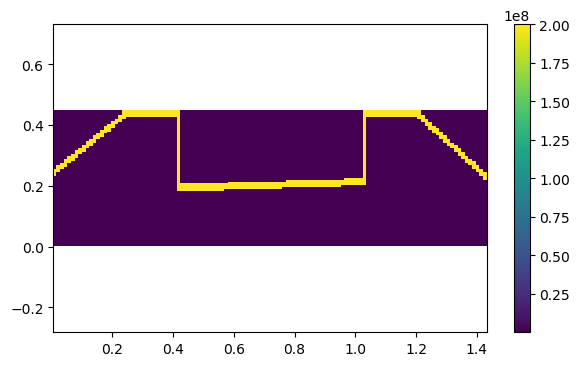

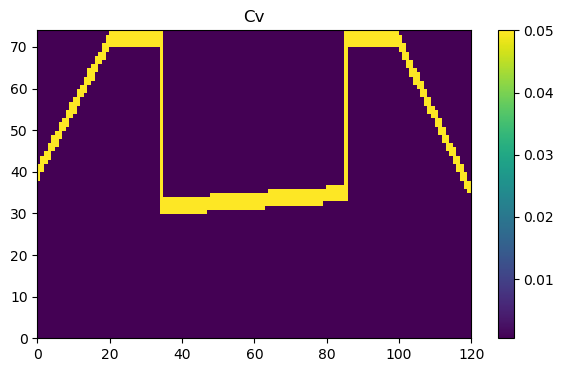

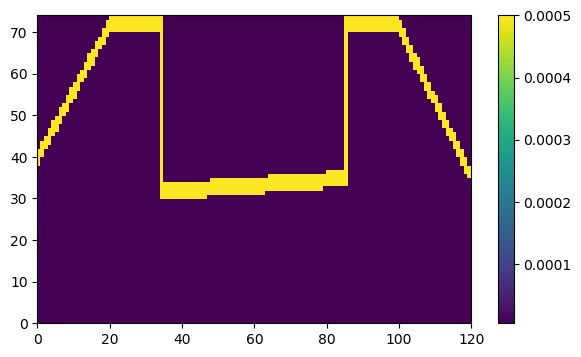

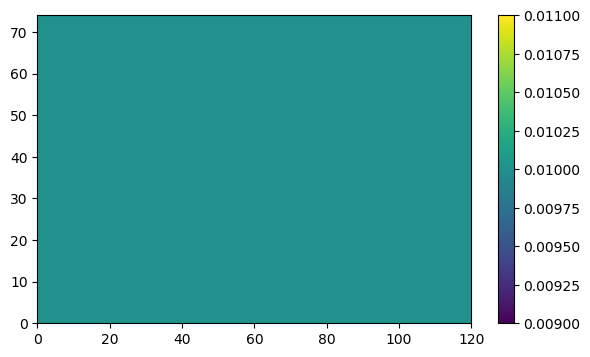

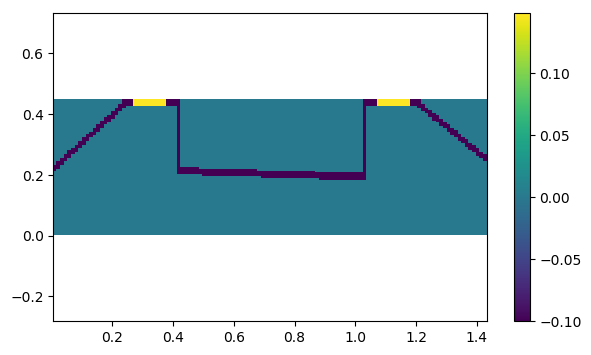

In [10]:



    
function sigma_func_hohlraum_spec(t,T,Nr,Nz,Lr,Lz,outer_radius,
                            inner_radius_left,wall_thickness,left_cone_z_width,
                            left_flat_z_width,mid_radius_left,mid_radius_right,inner_radius_right)
    left_slope = (outer_radius-inner_radius_left)/left_cone_z_width
    left_mid_z = left_flat_z_width+left_cone_z_width + wall_thickness/2
    right_mid_z = Lz - left_flat_z_width - left_cone_z_width - wall_thickness
    middle_slope = (mid_radius_right - mid_radius_left)/(right_mid_z-left_mid_z)
    right_slope = (outer_radius-inner_radius_right)/left_cone_z_width
    Ts = reshape(T,Nr,Nz)
    low_fact = 1e-7
    sigma = zeros(Nr,Nz) + low_fact*20.0*Ts.^-3.5
    dr = Lr/Nr 
    dz = Lz/Nz
    rcenter = range(0.5*dr, stop=Lr-0.5*dr, length=Nr)
    zcenter = range(0.5*dz, stop=Lz-0.5*dz, length=Nz)
    for i in 1:Nr
        for j in 1:Nz
            
            #check angle of left cone
            if (((zcenter[j] -0.5*dz) < left_cone_z_width) & 
                   ( ( (rcenter[i] - dr*0.5 >= (inner_radius_left + zcenter[j]*left_slope)) & 
                        (rcenter[i] + dr*0.5 <= (inner_radius_left + zcenter[j]*left_slope) + wall_thickness))))
                sigma[i,j] /= low_fact
            #check flat part of left
            elseif ( (((zcenter[j] -0.5*dz) >= left_cone_z_width) & 
                        ((zcenter[j] +0.5*dz) <= left_cone_z_width+left_flat_z_width+wall_thickness)) & 
                    (rcenter[i] - dr*0.5 >= outer_radius))
                sigma[i,j] /= low_fact        
            #neck down left
            elseif ( (( zcenter[j]+dz*0.5 <= left_cone_z_width+left_flat_z_width + wall_thickness) & 
                        ( zcenter[j]-dz*0.5 > left_cone_z_width+left_flat_z_width)) & 
                    (rcenter[i] - dr*0.5 > mid_radius_left))
                sigma[i,j] /= low_fact
            #middle part
            elseif ((((zcenter[j] -0.5*dz) >= left_mid_z) & ((zcenter[j]) <= right_mid_z)) & 
                    ( (rcenter[i] - dr*0.5 >=  mid_radius_left + (zcenter[j]-left_mid_z)*middle_slope) & 
                            (rcenter[i] + dr*0.5 <=  mid_radius_left + (zcenter[j]-left_mid_z)*middle_slope + wall_thickness)))
                sigma[i,j] /= low_fact
            #neck down right
            elseif ( (( zcenter[j] +.51*dz < right_mid_z + wall_thickness) & 
                        ( zcenter[j] - 0.499*dz >= right_mid_z)) & 
                    (rcenter[i] - dr*0.5 > mid_radius_right))
                sigma[i,j] /= low_fact
            #check flat part of right
            elseif ( (((zcenter[j] + dz) >= right_mid_z + wall_thickness) & 
                        ((zcenter[j] ) <= right_mid_z+left_flat_z_width+wall_thickness)) & 
                    (rcenter[i] - dr*0.5 >= outer_radius))
                sigma[i,j] /= low_fact    
            #check angle of right cone
            elseif (((zcenter[j] -0.49*dz) > right_mid_z+left_flat_z_width+wall_thickness) & 
                   ( ( (rcenter[i] - dr*0.5 >= (inner_radius_right + (Lz-zcenter[j])*right_slope)) & 
                        (rcenter[i] + dr*0.5 <= (inner_radius_right + (Lz-zcenter[j])*right_slope) + wall_thickness))))
                sigma[i,j] /= low_fact  
            end         
    
        end
    end
    sigma
end

function Cv_spec(t,T,Nr,Nz,Lr,Lz,outer_radius,
                            inner_radius_left,wall_thickness,left_cone_z_width,
                            left_flat_z_width,mid_radius_left,mid_radius_right,inner_radius_right)
    left_slope = (outer_radius-inner_radius_left)/left_cone_z_width
    left_mid_z = left_flat_z_width+left_cone_z_width + wall_thickness/2
    right_mid_z = Lz - left_flat_z_width - left_cone_z_width - wall_thickness
    middle_slope = (mid_radius_right - mid_radius_left)/(right_mid_z-left_mid_z)
    right_slope = (outer_radius-inner_radius_right)/left_cone_z_width
    low_fact = 1e-2
    cv = zeros(Nr,Nz) .+ 0.05*low_fact
    dr = Lr/Nr
    dz = Lz/Nz
    rcenter = range(0.5*dr, stop=Lr-0.5*dr, length=Nr)
    zcenter = range(0.5*dz, stop=Lz-0.5*dz, length=Nz)
    for i in 1:Nr
        for j in 1:Nz
            
            #check angle of left cone
            if (((zcenter[j] -0.5*dz) < left_cone_z_width) & 
                   ( ( (rcenter[i] - dr*0.5 >= (inner_radius_left + zcenter[j]*left_slope)) & 
                        (rcenter[i] + dr*0.5 <= (inner_radius_left + zcenter[j]*left_slope) + wall_thickness))))
                cv[i,j] /= low_fact
            #check flat part of left
            elseif ( (((zcenter[j] -0.5*dz) >= left_cone_z_width) & 
                        ((zcenter[j] +0.5*dz) <= left_cone_z_width+left_flat_z_width+wall_thickness)) & 
                    (rcenter[i] - dr*0.5 >= outer_radius))
                cv[i,j] /= low_fact        
            #neck down left
            elseif ( (( zcenter[j]+dz*0.5 <= left_cone_z_width+left_flat_z_width + wall_thickness) & 
                        ( zcenter[j]-dz*0.5 > left_cone_z_width+left_flat_z_width)) & 
                    (rcenter[i] - dr*0.5 > mid_radius_left))
                cv[i,j] /= low_fact
            #middle part
            elseif ((((zcenter[j] -0.5*dz) >= left_mid_z) & ((zcenter[j]) <= right_mid_z)) & 
                    ( (rcenter[i] - dr*0.5 >=  mid_radius_left + (zcenter[j]-left_mid_z)*middle_slope) & 
                            (rcenter[i] + dr*0.5 <=  mid_radius_left + (zcenter[j]-left_mid_z)*middle_slope + wall_thickness)))
                cv[i,j] /= low_fact
            #neck down right
            elseif ( (( zcenter[j] +.51*dz < right_mid_z + wall_thickness) & 
                        ( zcenter[j] - 0.499*dz >= right_mid_z)) & 
                    (rcenter[i] - dr*0.5 > mid_radius_right))
                cv[i,j] /= low_fact
            #check flat part of right
            elseif ( (((zcenter[j] + dz) >= right_mid_z + wall_thickness) & 
                        ((zcenter[j] ) <= right_mid_z+left_flat_z_width+wall_thickness)) & 
                    (rcenter[i] - dr*0.5 >= outer_radius))
                cv[i,j] /= low_fact    
            #check angle of right cone
            elseif (((zcenter[j] -0.49*dz) > right_mid_z+left_flat_z_width+wall_thickness) & 
                   ( ( (rcenter[i] - dr*0.5 >= (inner_radius_right + (Lz-zcenter[j])*right_slope)) & 
                        (rcenter[i] + dr*0.5 <= (inner_radius_right + (Lz-zcenter[j])*right_slope) + wall_thickness))))
                cv[i,j] /= low_fact  
            end         
        end
    end
    cv                 
end

function D_func(t,T,Nr,Nz,Lr,Lz,Er_tmp,sigma) 
    #larsen n=2 flux limiter
    Er = reshape(T,Nr,Nz)
    idz = Nz/Lz
    idr = Nr/Lr
    D = zeros(Nr,Nz) 
    for i in 1:Nr
        for j in 1:Nz
            gradE = zeros(2)
            if (i > 1)
                gradE[1] += (Er[i,j]-Er[i-1,j])*idr*0.5
            end
            if (i < Nr)
                gradE[1] += (Er[i+1,j]-Er[i,j])*idr*0.5
            end
            if (j > 1)
                gradE[2] += (Er[i,j]-Er[i,j-1])*idz*0.5
            end
            if (j < Nz)
                gradE[2] += (Er[i,j+1]-Er[i,j])*idz*0.5
            end
            normGradE = sqrt(gradE[1]^2 + gradE[2]^2)/(Er[i,j] + 1e-12)
            
            D[i,j] = 1.0./( (3.0*sigma[i,j])^4 + normGradE^4)^0.25
        end
    end
    D
end

function EOS(t,T,Nr,Nz,Lr,Lz)
    low_fact = 1e-3
    T_tmp = reshape(T,Nr,Nz)
    E = zeros(Nr,Nz) + T_tmp*(10*0.05)
    Cv = Cv_func(t,T,Nr,Nz,Lr,Lz)
    E = Cv.*T_tmp
    reshape(E,Nr*Nz)                 
end

function invEOS(t,T,Nr,Nz,Lr,Lz)
    E_tmp = reshape(T,Nr,Nz)
    T = zeros(Nr,Nz) + E_tmp/(10*0.05)
    Cv = Cv_func(t,T,Nr,Nz,Lr,Lz)
    reshape(E_tmp./Cv,Nr*Nz)
end

function Q_func_spec(t,T,Nr,Nz,Lr,Lz,outer_radius,
                            inner_radius_left,wall_thickness,left_cone_z_width,
                            left_flat_z_width,mid_radius_left,mid_radius_right,inner_radius_right,laser_scale)
    left_slope = (outer_radius-inner_radius_left)/left_cone_z_width
    left_mid_z = left_flat_z_width+left_cone_z_width + wall_thickness/2
    right_mid_z = Lz - left_flat_z_width - left_cone_z_width - wall_thickness
    middle_slope = (mid_radius_right - mid_radius_left)/(right_mid_z-left_mid_z)
    right_slope = (outer_radius-inner_radius_right)/left_cone_z_width
    Q = zeros(Nr,Nz)
    dr = Lr/Nr
    dz = Lz/Nz
    source_vol = 0.05*pi*((outer_radius+wall_thickness/2)^2 - (outer_radius)^2)
    source_strength = 250.0e3/1e9/(0.25*laser_scale)/source_vol/2
    rcenter = range(0.5*dr, stop=Lr-0.5*dr, length=Nr)
    zcenter = range(0.5*dz, stop=Lz-0.5*dz, length=Nz)
    # keep radiation sources on for 2.5 nanoseconds because that is how long the laser is on for 
    if t <= .25*laser_scale
     for i in 1:Nr
        for j in 1:Nz
            if (( abs(zcenter[j] - (left_flat_z_width*0.5+left_cone_z_width )) < 0.05) & 
                        (rcenter[i] - dr*0.5 > outer_radius))
                # got Q value by taking 250 KJ/10^-8seconds (from graph of laser pulse) and dividing by the volume for the 
                #radiation sources and making it in units of gigajoule/cm^3/10^-8seconds
                Q[i,j] = source_strength/laser_scale
            elseif (( abs(zcenter[j] - (left_flat_z_width*0.5+right_mid_z + wall_thickness)) < 0.05) & 
                        (rcenter[i] - dr*0.5 > outer_radius))
                # got Q value by taking 250 KJ/10^-8seconds (from graph of laser pulse) and dividing by the volume for the 
                #radiation sources and making it in units of gigajoule/cm^3/10^-8seconds
                Q[i,j] = source_strength/laser_scale
            end
        end
      end
    else
        Q = zeros(Nr,Nz)
    end
    Q
end

outer_radius_nom = 3.5*0.1 #nominal radius is 3.5mm
inner_radius_left_nom = 1.5*0.1 #left opening is 1.5mm radius
wall_thickness = 0.3*0.1 #hohlraum thickness is 0.2mm
left_cone_z_width_nom = 2*0.1 #left cone angle part is 2mm in z
left_flat_z_width_nom = 1.3*0.1 #flat part of left cone is 1.3mm
mid_radius_left_nom = 3.7*0.1*0.5 #left beginning of middle part
mid_radius_right_nom = 4.1*0.1*0.5 #right end of middle part
inner_radius_right_nom = 4.2*0.5*0.1

scale = 1.2
inner_fact = 0.8
LR_open = 1.25
laser_scale = 1.25

outer_radius_fact = 1.0*scale
inner_radius_left_fact = 1.0*scale*LR_open
left_cone_z_width_fact = 1.0*scale
left_flat_z_width_fact = 1.0*scale
mid_radius_left_fact = 1.0*scale*inner_fact
mid_radius_right_fact = 1.0*scale*inner_fact
inner_radius_right_fact = 1.0*scale/LR_open
laser_scale = 1.0

Lz_nom = 12
Lz_fact = 1.0*scale

Lr = (outer_radius_nom*outer_radius_fact+wall_thickness)
Lz = Lz_nom*Lz_fact*0.1
Nr = 37*2
Nz = 120

dr = Lr/Nr
dz = Lz/Nz
rcenter = range(0.5*dr, stop=Lr-0.5*dr, length=Nr)
zcenter = range(0.5*dz, stop=Lz-0.5*dz, length=Nz)


T = zeros(Nr*Nz) .+ 1.0e-2

sigma_func_hohlraum(t,T,Nr,Nz,Lr,Lz) = sigma_func_hohlraum_spec(t,T,Nr,Nz,Lr,Lz,outer_radius_nom*outer_radius_fact,
                            inner_radius_left_nom*inner_radius_left_fact,wall_thickness,left_cone_z_width_nom*left_cone_z_width_fact,
                            left_flat_z_width_nom*left_flat_z_width_fact,
                            mid_radius_left_nom*mid_radius_left_fact,
                            mid_radius_right_nom*mid_radius_right_fact,
                            inner_radius_right_nom*inner_radius_right_fact)

Cv_func(t,T,Nr,Nz,Lr,Lz) = Cv_spec(t,T,Nr,Nz,Lr,Lz,outer_radius_nom*outer_radius_fact,
                            inner_radius_left_nom*inner_radius_left_fact,wall_thickness,left_cone_z_width_nom*left_cone_z_width_fact,
                            left_flat_z_width_nom*left_flat_z_width_fact,
                            mid_radius_left_nom*mid_radius_left_fact,
                            mid_radius_right_nom*mid_radius_right_fact,
                            inner_radius_right_nom*inner_radius_right_fact)
Q_func(t,T,Nr,Nz,Lr,Lz) = Q_func_spec(t,T,Nr,Nz,Lr,Lz,outer_radius_nom*outer_radius_fact,
                            inner_radius_left_nom*inner_radius_left_fact,wall_thickness,left_cone_z_width_nom*left_cone_z_width_fact,
                            left_flat_z_width_nom*left_flat_z_width_fact,
                            mid_radius_left_nom*mid_radius_left_fact,
                            mid_radius_right_nom*mid_radius_right_fact,
                            inner_radius_right_nom*inner_radius_right_fact,
                            laser_scale)
R,Z = meshgrid(rcenter,zcenter)
sig = sigma_func_hohlraum(0,T,Nr,Nz,Lr,Lz)
figure(figsize=(7,4))
pcolormesh(Z,R,(sig-0*reverse(sig,dims=2)))
axis("equal")
colorbar()
show()

R,Z = meshgrid(rcenter,zcenter)
cv = Cv_func(0,T,Nr,Nz,Lr,Lz)
figure(figsize=(7,4))
pcolormesh(cv)
colorbar()
title("Cv")
show()


E = EOS(0,T,Nr,Nz,Lr,Lz)
figure(figsize=(7,4))
pcolormesh(reshape(E,Nr,Nz))
colorbar()
show()

T_test = invEOS(0,E,Nr,Nz,Lr,Lz)
figure(figsize=(7,4))
pcolormesh(reshape(T_test,Nr,Nz))
colorbar()
show()


Q = Q_func(0,T,Nr,Nz,Lr,Lz)
figure(figsize=(7,4))
pcolormesh(Z,R,(Q-0.1*(reverse(sig,dims=2))/maximum(sig)))
axis("equal")
colorbar()
show()

In [ ]:
#design points
pos = [[0.95252958, 1.02554616, 0.96724666, 1.11254449],
       [0.87575231, 1.16173335, 1.14289694, 1.07584874],
       [1.03062109, 0.98488448, 0.93539221, 0.90101826],
       [0.85365657, 0.99472409, 0.8581207 , 1.14240262],
       [1.12262237, 0.96889586, 0.8114492 , 0.83514476],
       [1.19443641, 0.85708485, 0.87895174, 0.99278747],
       [0.9567126 , 0.8169089 , 0.97314977, 0.8991492 ],
       [0.96821039, 1.05292669, 1.12774551, 1.03800779],
       [0.94107511, 1.04639937, 1.19794126, 1.12881077],
       [0.88161331, 0.83347558, 0.91414927, 0.83785056],
       [1.01918515, 1.10644018, 0.98370934, 0.8175587 ],
       [1.07717147, 0.96688888, 1.10569572, 0.87856112],
       [0.87088919, 1.12479476, 0.90734452, 1.144941  ],
       [0.9439458 , 0.85170265, 0.9308593 , 1.00066189],
       [0.97969744, 1.01444999, 1.0650034 , 0.84766071],
       [1.08758174, 0.82443645, 0.83551078, 1.10045333],
       [1.10097653, 0.82560199, 0.85454447, 0.89110995],
       [1.1380909 , 0.94997355, 0.98850499, 0.92407492],
       [0.88977426, 1.06054931, 1.11882927, 0.88271243],
       [0.89841682, 0.8463632 , 1.1370387 , 0.80478019],
       [0.98837763, 1.19076611, 0.93865519, 1.01443871],
       [0.99766646, 1.16727876, 1.08556879, 1.04383018],
       [0.82366457, 0.90357002, 0.92443948, 0.86570836],
       [0.84451556, 0.93285054, 0.88640825, 0.81883689],
       [1.09558775, 0.84251343, 1.0104744 , 1.09810363],
       [1.05736865, 1.17776789, 0.95740696, 1.15727209],
       [0.91458749, 1.1318949 , 0.82209041, 0.94990944],
       [1.00698605, 1.06721125, 1.01592713, 0.8303318 ],
       [0.9332247 , 1.00827838, 1.01921833, 1.19504582],
       [0.83281455, 0.88987781, 1.14950578, 0.80808328],
       [1.00444714, 1.18424792, 1.07825025, 0.95274521],
       [1.01708569, 0.89380739, 0.95244055, 1.09286605],
       [0.80709205, 1.07711023, 1.16204251, 0.85389961],
       [1.06519528, 1.08395325, 0.84696155, 1.12058507],
       [1.08314876, 0.91751968, 1.04472108, 1.05703111],
       [0.91046968, 0.95980258, 1.05948007, 1.1742291 ],
       [1.03646514, 0.86578354, 0.87271569, 1.08127968],
       [1.15796999, 1.09073165, 0.90270525, 0.94068365],
       [0.86531686, 1.11553021, 1.18057606, 1.01200845],
       [0.83999406, 0.92294473, 1.16960284, 1.0199596 ],
       [1.04925561, 1.07248105, 1.04144514, 1.16620452],
       [1.05155159, 0.90920598, 0.81512882, 0.96851553],
       [1.14399011, 1.09915515, 1.1628919 , 1.02923344],
       [1.16352076, 1.15526617, 1.15622035, 1.03611469],
       [1.11166917, 1.10330217, 0.89256069, 0.86046775],
       [1.13697519, 1.02098193, 0.94855573, 0.87315782],
       [0.86017624, 0.87524787, 1.06937909, 1.11183456],
       [1.19368068, 0.86936891, 1.19145857, 0.98055722],
       [0.92358924, 1.19761969, 0.80076316, 1.19349778],
       [0.81362518, 1.14782807, 1.11201583, 1.15374075],
       [0.92666734, 0.93821599, 1.0347207 , 0.99696718],
       [1.07325402, 1.13044368, 0.97894634, 0.92524511],
       [1.15248833, 1.03922524, 1.11316447, 0.97342803],
       [0.83093963, 0.97952048, 1.02680553, 1.07024307],
       [1.17594037, 1.00195889, 0.89607683, 1.13241279],
       [0.98296231, 0.93121672, 0.84167435, 1.17512351],
       [1.1828626 , 1.13977512, 0.86682674, 1.05544137],
       [1.17277671, 0.95156534, 1.09817732, 0.93359577],
       [0.90496886, 0.88708069, 1.09056949, 0.91191697],
       [1.12506558, 0.80287062, 0.82922124, 0.91747014],
       [1.03779118, 1.1693216 , 1.05479722, 1.06493118],
       [1.11658233, 0.99311109, 1.18238247, 1.18653791],
       [0.80313659, 0.80984527, 1.00167844, 0.96121844],
       [0.96939674, 1.03348215, 0.99928983, 0.98684716]]

for inpts in pos
    scale = inpts[1]
    inner_fact = inpts[2]
    LR_open = inpts[3]
    laser_scale = inpts[4]
    println(scale,inner_fact,LR_open,laser_scale)

    outer_radius_fact = 1.0*scale
    inner_radius_left_fact = 1.0*scale*LR_open
    left_cone_z_width_fact = 1.0*scale
    left_flat_z_width_fact = 1.0*scale
    mid_radius_left_fact = 1.0*scale*inner_fact
    mid_radius_right_fact = 1.0*scale*inner_fact
    inner_radius_right_fact = 1.0*scale/LR_open


    dt = 0.001*laser_scale
    tfinal = laser_scale*0.5

    Lz_nom = 12
    Lr = outer_radius_nom*outer_radius_fact+wall_thickness
    Lz = Lz_nom*scale*0.1
    Nr = 37*2*4
    Nz = 120*4
    T = zeros(Nr*Nz) .+ 1.0e-2
    println("Running until time $(tfinal)")
    println("Size of domain in Z is $(Lz)")
    times, Er_t,T_t = time_dep_RT(tfinal,dt,T,zeros(Nr*Nz),D_func, sigma_func_hohlraum, Q_func,Cv_func,EOS,invEOS,
                         Nr, Nz, Lr, Lz, lower_z="vacuum", upper_z="vacuum", upper_r="vacuum",LOUD=-1,
       fname="/Volumes/Backup/ApolloMcPhee/AMP_$(Nr)_$(Nz)_$(dt)_$(scale)_$(inner_fact)_$(LR_open)_$(laser_scale).jld");
end

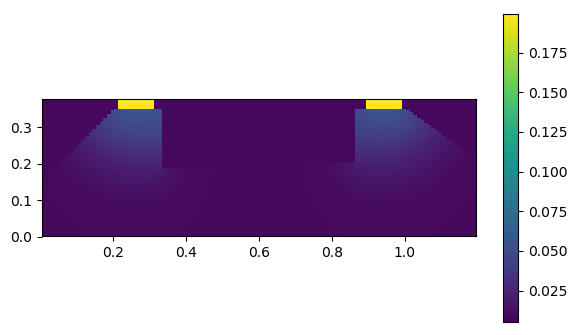

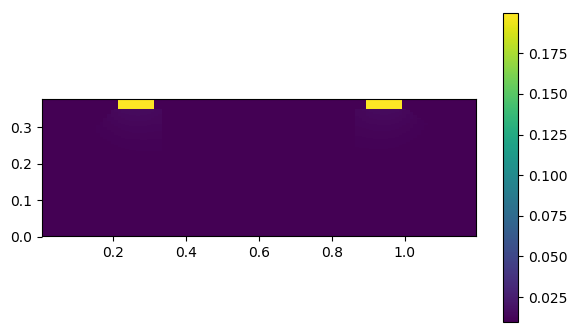

(0.005000000000000001, 1.1950000000000003, 0.001283783783783784, 0.3787162162162162)

In [46]:
Tr_plot = reshape((Er_t[:,size(times)[1]]/a).^.25,Nr,Nz)
figure(figsize=(7,4))
pcolormesh(Z,R,Tr_plot)
colorbar()
axis("scaled")

T_plot = reshape(T_t[:,size(times)[1]],Nr,Nz)
figure(figsize=(7,4))
pcolormesh(Z,R,T_plot)
colorbar()
ylim(0,4)
xlim(0,7)
axis("scaled")

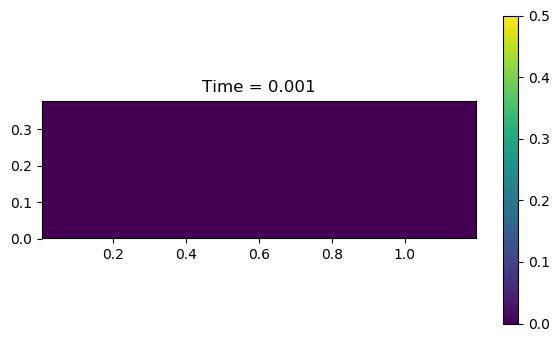

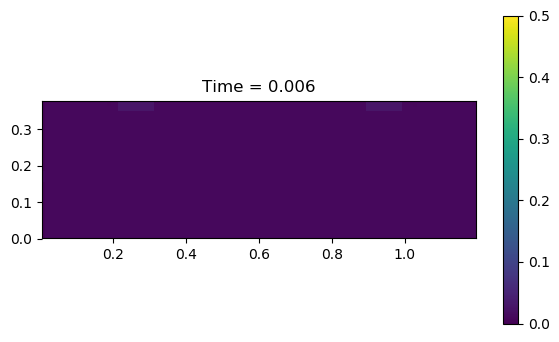

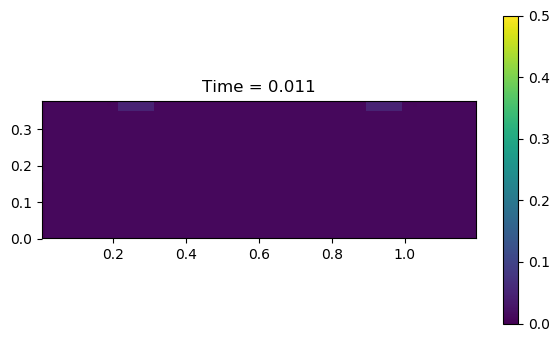

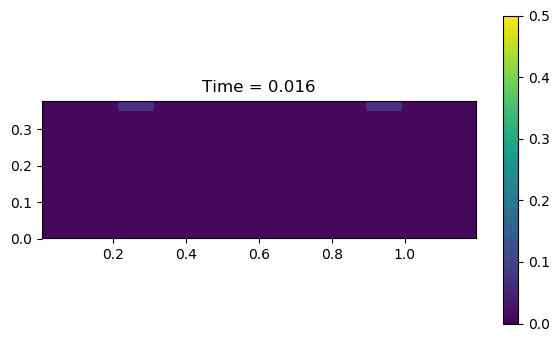

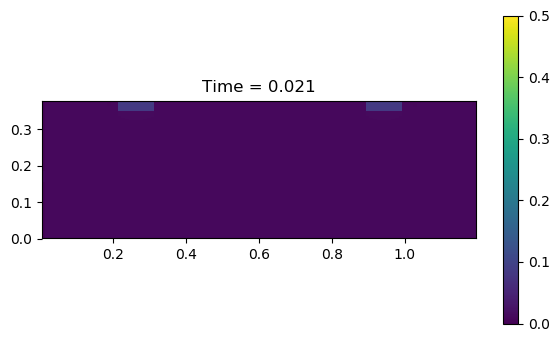

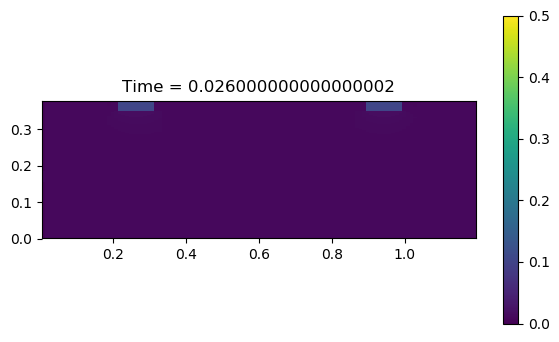

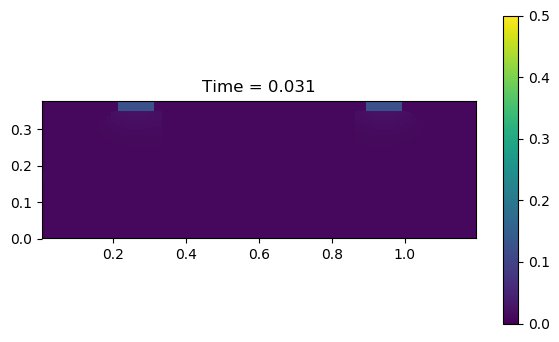

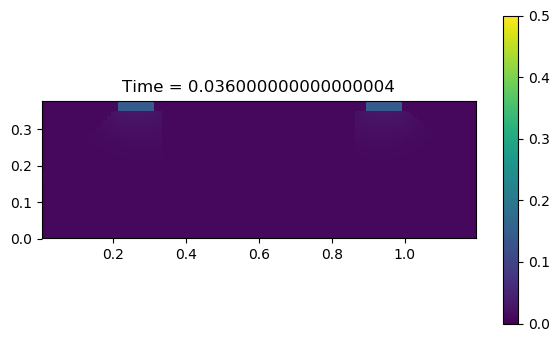

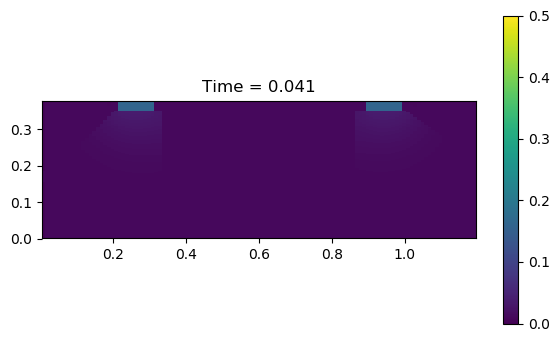

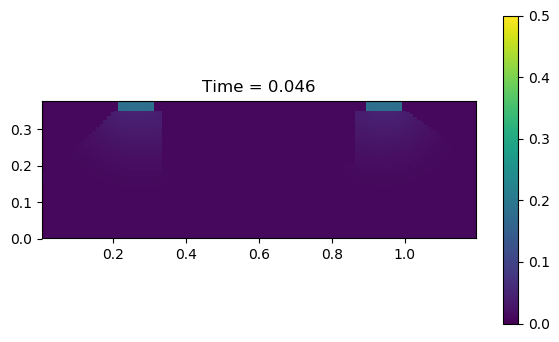

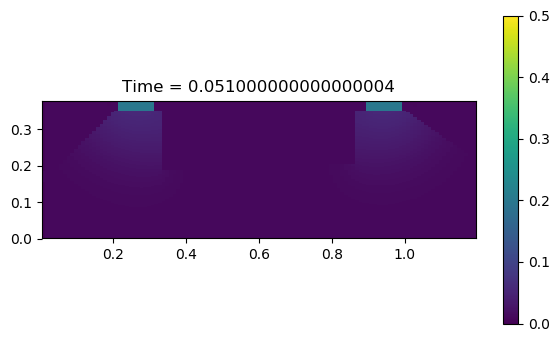

In [47]:

for i in 1:5:size(Er_t)[2]
    time_shown = i*dt
    Er_half = Er_t[:,i]
    T_half = (Er_half/a).^.25
    T_plot = reshape(T_half,Nr,Nz)
    figure(figsize=(7,4))
    title("Time = $(time_shown)")
    pcolormesh(Z,R,T_plot, vmin=0, vmax = 0.5)
    colorbar()
    ylim(0,4)
    xlim(0,7)
    axis("scaled")
end
    

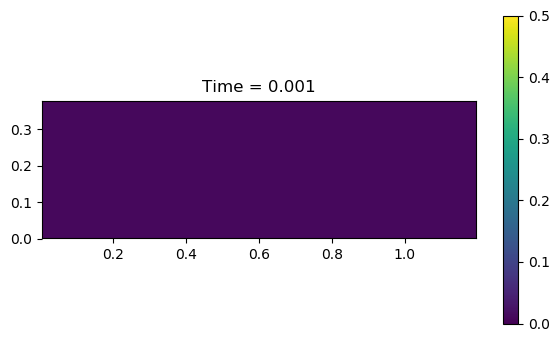

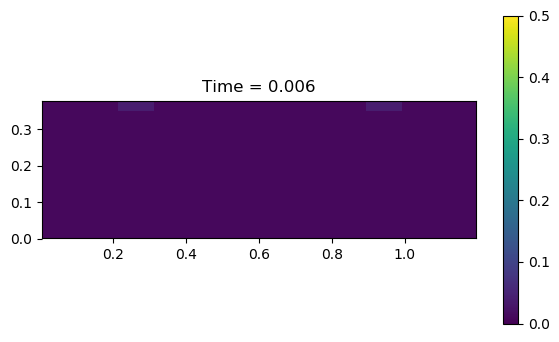

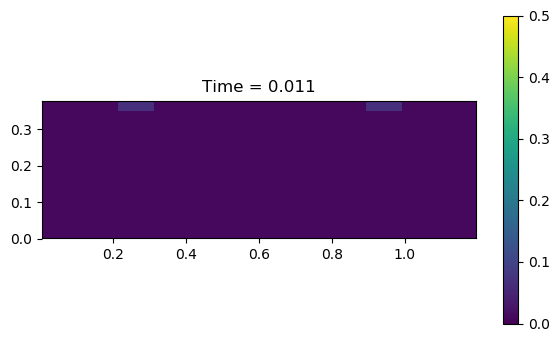

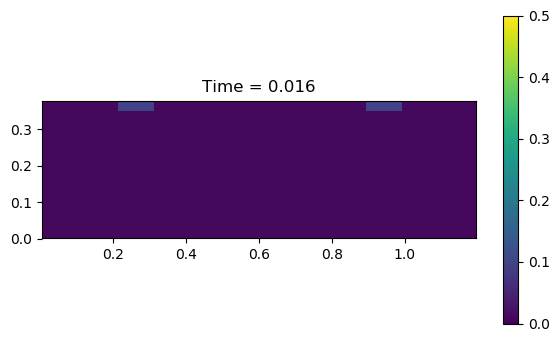

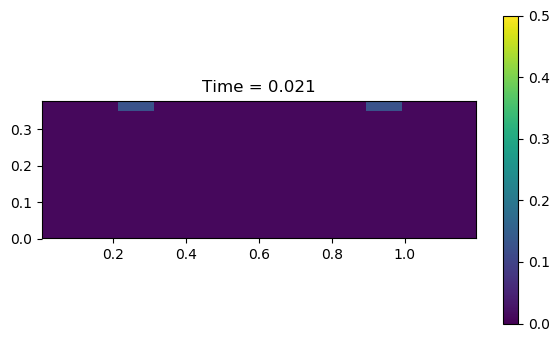

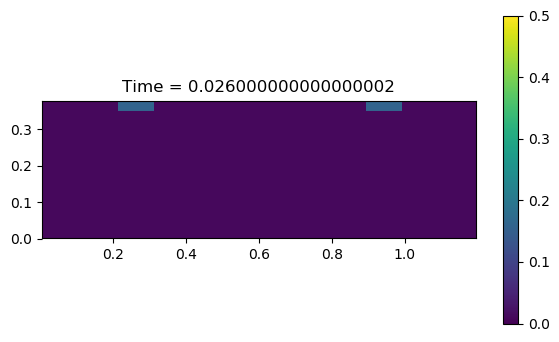

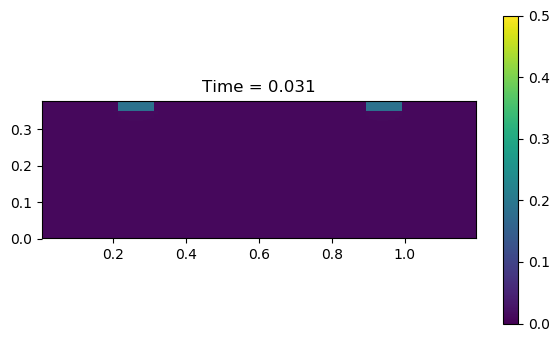

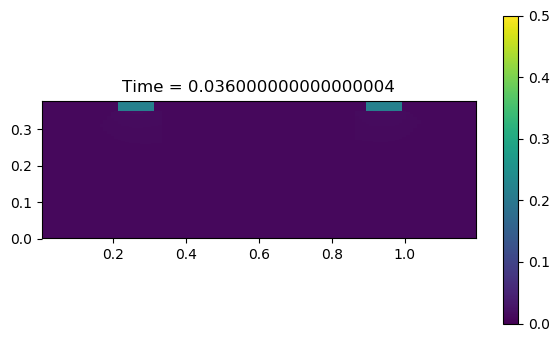

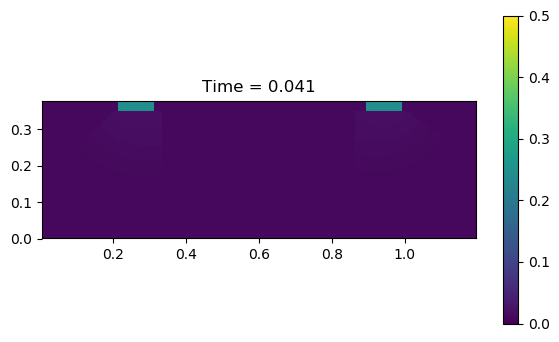

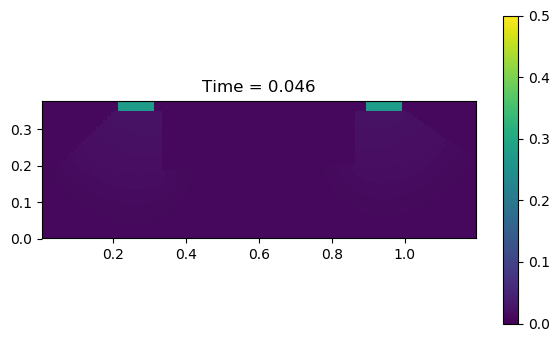

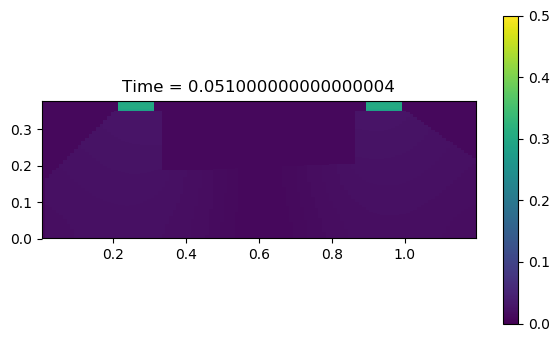

In [44]:

for i in 1:5:size(T_t)[2]
    time_shown = i*dt
    T_plot = reshape(T_t[:,i],Nr,Nz)
    figure(figsize=(7,4))
    title("Time = $(time_shown)")
    pcolormesh(Z,R,T_plot, vmin=0, vmax = 0.5)
    colorbar()
    ylim(0,4)
    xlim(0,7)
    axis("scaled")
end
    

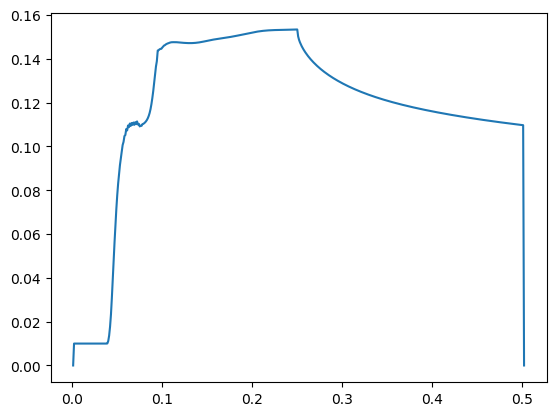

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x147f56ed0>

In [212]:
T_mid = zeros(size(Er_t)[2])
for i in 1:size(Er_t)[2]
    time_shown = i*dt
    Er_half = Er_t[:,i]
    T_half = (Er_half/a).^.25
    T_plot = reshape(T_half,Nr,Nz)
    T_mid[i] = mean(T_plot[1:10,40:60])
    
end
plot(dt*(1:size(Er_t)[2]), T_mid)

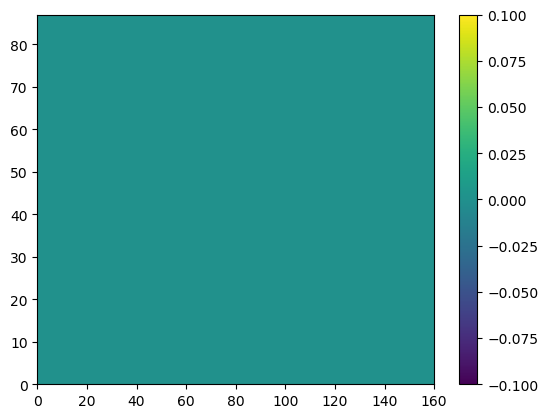

PyObject <matplotlib.colorbar.Colorbar object at 0x152cc4810>

In [197]:
pcolormesh(T_plot-flipdim(T_plot,2))
colorbar()

In [6]:
pos = [[0.95252958, 1.02554616, 0.96724666, 1.11254449],
       [0.87575231, 1.16173335, 1.14289694, 1.07584874],
       [1.03062109, 0.98488448, 0.93539221, 0.90101826],
       [0.85365657, 0.99472409, 0.8581207 , 1.14240262],
       [1.12262237, 0.96889586, 0.8114492 , 0.83514476],
       [1.19443641, 0.85708485, 0.87895174, 0.99278747],
       [0.9567126 , 0.8169089 , 0.97314977, 0.8991492 ],
       [0.96821039, 1.05292669, 1.12774551, 1.03800779],
       [0.94107511, 1.04639937, 1.19794126, 1.12881077],
       [0.88161331, 0.83347558, 0.91414927, 0.83785056],
       [1.01918515, 1.10644018, 0.98370934, 0.8175587 ],
       [1.07717147, 0.96688888, 1.10569572, 0.87856112],
       [0.87088919, 1.12479476, 0.90734452, 1.144941  ],
       [0.9439458 , 0.85170265, 0.9308593 , 1.00066189],
       [0.97969744, 1.01444999, 1.0650034 , 0.84766071],
       [1.08758174, 0.82443645, 0.83551078, 1.10045333],
       [1.10097653, 0.82560199, 0.85454447, 0.89110995],
       [1.1380909 , 0.94997355, 0.98850499, 0.92407492],
       [0.88977426, 1.06054931, 1.11882927, 0.88271243],
       [0.89841682, 0.8463632 , 1.1370387 , 0.80478019],
       [0.98837763, 1.19076611, 0.93865519, 1.01443871],
       [0.99766646, 1.16727876, 1.08556879, 1.04383018],
       [0.82366457, 0.90357002, 0.92443948, 0.86570836],
       [0.84451556, 0.93285054, 0.88640825, 0.81883689],
       [1.09558775, 0.84251343, 1.0104744 , 1.09810363],
       [1.05736865, 1.17776789, 0.95740696, 1.15727209],
       [0.91458749, 1.1318949 , 0.82209041, 0.94990944],
       [1.00698605, 1.06721125, 1.01592713, 0.8303318 ],
       [0.9332247 , 1.00827838, 1.01921833, 1.19504582],
       [0.83281455, 0.88987781, 1.14950578, 0.80808328],
       [1.00444714, 1.18424792, 1.07825025, 0.95274521],
       [1.01708569, 0.89380739, 0.95244055, 1.09286605],
       [0.80709205, 1.07711023, 1.16204251, 0.85389961],
       [1.06519528, 1.08395325, 0.84696155, 1.12058507],
       [1.08314876, 0.91751968, 1.04472108, 1.05703111],
       [0.91046968, 0.95980258, 1.05948007, 1.1742291 ],
       [1.03646514, 0.86578354, 0.87271569, 1.08127968],
       [1.15796999, 1.09073165, 0.90270525, 0.94068365],
       [0.86531686, 1.11553021, 1.18057606, 1.01200845],
       [0.83999406, 0.92294473, 1.16960284, 1.0199596 ],
       [1.04925561, 1.07248105, 1.04144514, 1.16620452],
       [1.05155159, 0.90920598, 0.81512882, 0.96851553],
       [1.14399011, 1.09915515, 1.1628919 , 1.02923344],
       [1.16352076, 1.15526617, 1.15622035, 1.03611469],
       [1.11166917, 1.10330217, 0.89256069, 0.86046775],
       [1.13697519, 1.02098193, 0.94855573, 0.87315782],
       [0.86017624, 0.87524787, 1.06937909, 1.11183456],
       [1.19368068, 0.86936891, 1.19145857, 0.98055722],
       [0.92358924, 1.19761969, 0.80076316, 1.19349778],
       [0.81362518, 1.14782807, 1.11201583, 1.15374075],
       [0.92666734, 0.93821599, 1.0347207 , 0.99696718],
       [1.07325402, 1.13044368, 0.97894634, 0.92524511],
       [1.15248833, 1.03922524, 1.11316447, 0.97342803],
       [0.83093963, 0.97952048, 1.02680553, 1.07024307],
       [1.17594037, 1.00195889, 0.89607683, 1.13241279],
       [0.98296231, 0.93121672, 0.84167435, 1.17512351],
       [1.1828626 , 1.13977512, 0.86682674, 1.05544137],
       [1.17277671, 0.95156534, 1.09817732, 0.93359577],
       [0.90496886, 0.88708069, 1.09056949, 0.91191697],
       [1.12506558, 0.80287062, 0.82922124, 0.91747014],
       [1.03779118, 1.1693216 , 1.05479722, 1.06493118],
       [1.11658233, 0.99311109, 1.18238247, 1.18653791],
       [0.80313659, 0.80984527, 1.00167844, 0.96121844],
       [0.96939674, 1.03348215, 0.99928983, 0.98684716]]

64-element Array{Array{Float64,1},1}:
 [0.95252958, 1.02554616, 0.96724666, 1.11254449]
 [0.87575231, 1.16173335, 1.14289694, 1.07584874]
 [1.03062109, 0.98488448, 0.93539221, 0.90101826]
 [0.85365657, 0.99472409, 0.8581207, 1.14240262] 
 [1.12262237, 0.96889586, 0.8114492, 0.83514476] 
 [1.19443641, 0.85708485, 0.87895174, 0.99278747]
 [0.9567126, 0.8169089, 0.97314977, 0.8991492]   
 [0.96821039, 1.05292669, 1.12774551, 1.03800779]
 [0.94107511, 1.04639937, 1.19794126, 1.12881077]
 [0.88161331, 0.83347558, 0.91414927, 0.83785056]
 [1.01918515, 1.10644018, 0.98370934, 0.8175587] 
 [1.07717147, 0.96688888, 1.10569572, 0.87856112]
 [0.87088919, 1.12479476, 0.90734452, 1.144941]  
 ⋮                                               
 [1.15248833, 1.03922524, 1.11316447, 0.97342803]
 [0.83093963, 0.97952048, 1.02680553, 1.07024307]
 [1.17594037, 1.00195889, 0.89607683, 1.13241279]
 [0.98296231, 0.93121672, 0.84167435, 1.17512351]
 [1.1828626, 1.13977512, 0.86682674, 1.05544137] 
 [1.17277671

In [23]:
dEr = load("crooked_pipe74_120_0.0008047801900000001_0.89841682_0.8463632_1.1370387_0.80478019.jld")

Dict{String,Any} with 7 entries:
  "dz"    => 0.00898417
  "Nz"    => 120
  "T"     => [0.01 0.0099988 … 0.0872353 0.0; 0.01 0.0099988 … 0.0873356 0.0; ……
  "dr"    => 0.00465467
  "Er"    => [0.0 1.27268e-11 … 6.56967e-7 0.0; 0.0 1.27269e-11 … 6.5995e-7 0.0…
  "Nr"    => 74
  "times" => [0.0, 0.00080478, 0.00160956, 0.00241434, 0.00321912, 0.0040239, 0…

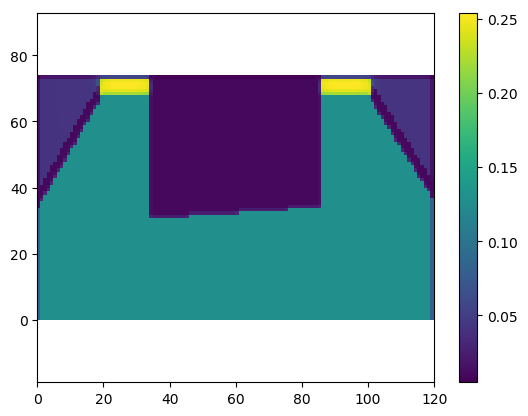

(0.0, 120.0, 0.0, 74.0)

In [30]:
er = reshape(dEr["Er"][:,500],(74,120))
pcolormesh((er/a).^.25)
colorbar()
axis("equal")

In [61]:
print("Current directory: ", pwd())
foreach(readdir()) do f
       if (occursin("crooked_pipe74_120", f))
           println("\nObject: ", f)
        dEr = load(f,"Er")
        
        CSV.write("/Volumes/Backup/ApolloMcPhee/low_res.csv",DataFrame(dEr); append=true)
        
    end
        # you can customize what you want to print
end

Current directory: /Users/ryanmcclarren/Dropbox/Papers/LANL/Flux Limited Diffusion
Object: crooked_pipe74_120_0.0008047801900000001_0.89841682_0.8463632_1.1370387_0.80478019.jld

Object: crooked_pipe74_120_0.00080808328_0.83281455_0.88987781_1.14950578_0.80808328.jld

Object: crooked_pipe74_120_0.0008175586999999999_1.01918515_1.10644018_0.98370934_0.8175587.jld

Object: crooked_pipe74_120_0.0008188368900000001_0.84451556_0.93285054_0.88640825_0.81883689.jld

Object: crooked_pipe74_120_0.0008303318_1.00698605_1.06721125_1.01592713_0.8303318.jld

Object: crooked_pipe74_120_0.00083514476_1.12262237_0.96889586_0.8114492_0.83514476.jld

Object: crooked_pipe74_120_0.00083785056_0.88161331_0.83347558_0.91414927_0.83785056.jld

Object: crooked_pipe74_120_0.00084766071_0.97969744_1.01444999_1.0650034_0.84766071.jld

Object: crooked_pipe74_120_0.00085389961_0.80709205_1.07711023_1.16204251_0.85389961.jld

Object: crooked_pipe74_120_0.00086046775_1.11166917_1.10330217_0.89256069_0.86046775.jld



In [52]:
Tables.matrix(dEr)

7×2 Array{Any,2}:
 "dz"     …    0.00898417                                                                                                                                                                                                             
 "Nz"        120.0                                                                                                                                                                                                                    
 "T"            [0.01 0.0099988 … 0.0872353 0.0; 0.01 0.0099988 … 0.0873356 0.0; … ; 0.01 0.0099988 … 0.0115874 0.0; 0.01 0.00999872 … 0.00943217 0.0]                                                                                
 "dr"          0.00465467                                                                                                                                                                                                             
 "Er"           [0.0 1.27268e-11 … 6.56967e-7 0.0; 0.0 1.2

In [59]:
import Pkg; Pkg.add("DataFrames")

 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
  [a93c6f00] + DataFrames v0.20.0
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
